In [33]:
import numpy as np
import pandas as pd
import time
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [34]:
data = pd.read_csv('covtype.csv')

In [35]:
data['Wilderness_Area']=0
for i in range(1,5,1):
    data=data.rename(columns={f'Wilderness_Area{i}':i})
data['Wilderness_Area'] = data[[1,2,3,4]].idxmax(axis=1)
data=data.drop([1,2,3,4],axis=1)

In [36]:
data['Soil_Type']=0
for i in range(1,41,1):
    data=data.rename(columns={f'Soil_Type{i}':i})
data['Soil_Type'] = data[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]].idxmax(axis=1)
for i in range(1,41,1):
    data=data.drop([i],axis=1)

In [37]:
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Wilderness_Area,Soil_Type
0,2596,51,3,258,0,510,221,232,148,6279,5,1,29
1,2590,56,2,212,-6,390,220,235,151,6225,5,1,29
2,2804,139,9,268,65,3180,234,238,135,6121,2,1,12
3,2785,155,18,242,118,3090,238,238,122,6211,2,1,30
4,2595,45,2,153,-1,391,220,234,150,6172,5,1,29
5,2579,132,6,300,-15,67,230,237,140,6031,2,1,29
6,2606,45,7,270,5,633,222,225,138,6256,5,1,29
7,2605,49,4,234,7,573,222,230,144,6228,5,1,29
8,2617,45,9,240,56,666,223,221,133,6244,5,1,29
9,2612,59,10,247,11,636,228,219,124,6230,5,1,29


In [38]:
data=data.sample(n=100000)
data.shape

(100000, 13)

In [39]:
X=pd.DataFrame(data.drop(['Cover_Type'],axis=1))
Y=data['Cover_Type']

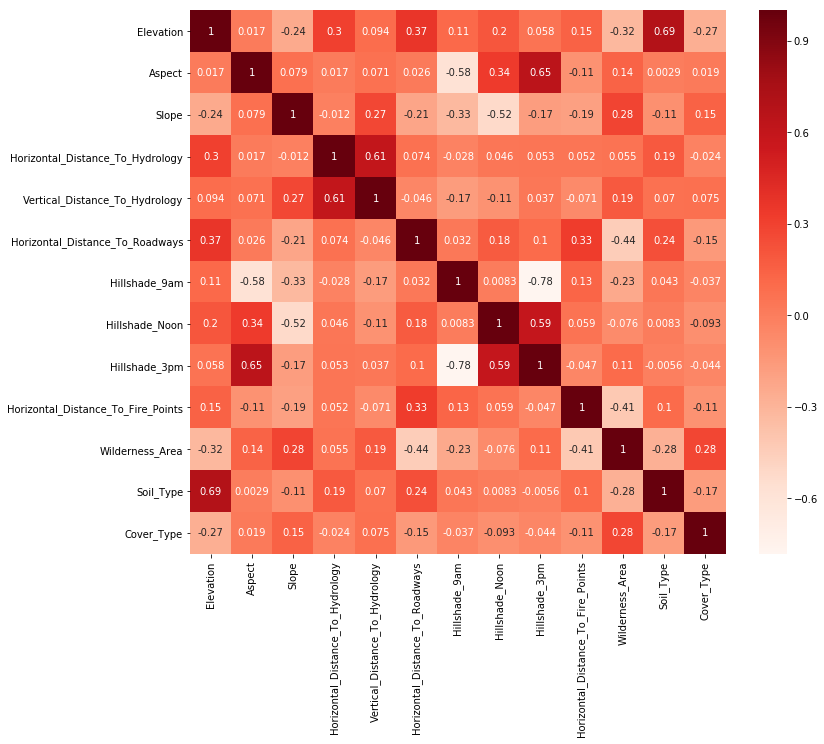

In [40]:
plt.figure(figsize=(12,10))
cor = pd.concat([X,Y],axis=1).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [41]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=8)

In [42]:
X_train.shape

(60000, 12)

In [43]:
# acc=[]
# import warnings
# warnings.filterwarnings("ignore")
# for i in range(-5,16,2):
#     svm = SVC(kernel='linear',C=pow(2,i))
# #     svm = SVC(kernel='poly',C=pow(2,i),gamma='auto_deprecated',probability=True)  
#     svm.fit(X_train, Y_train)
#     Y_pred_svm = svm.predict(X_test)
#     acc_svm= round(svm.score(X_test, Y_test) * 100, 2)
#     print("SVM",acc_svm," c= ",i)
#     acc.append(acc_svm)
    
#    # print(confusion_matrix(Y_pred_svm, Y_test))
#     #print(classification_report(Y_test,Y_pred_svm))

In [44]:
svm = SVC(kernel='linear')
svm.fit(X_train, Y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [45]:
Y_pred_svm = svm.predict(X_test)
acc_svm= round(svm.score(X_test, Y_test) * 100, 2)
print("SVM",acc_svm)

SVM 71.56


In [46]:
print(confusion_matrix(Y_test,Y_pred_svm))
print(classification_report(Y_test,Y_pred_svm))

[[10369  4015     4     0     0     0   202]
 [ 3710 15292   379     0     0     3    11]
 [    0   257  2290     0     0    12     0]
 [    0     0   204     0     0    13     0]
 [    1   625    26     0     0     0     0]
 [    0   420   779     0     0    11     0]
 [  701    13     0     0     0     0   663]]
              precision    recall  f1-score   support

           1       0.70      0.71      0.71     14590
           2       0.74      0.79      0.76     19395
           3       0.62      0.89      0.73      2559
           4       0.00      0.00      0.00       217
           5       0.00      0.00      0.00       652
           6       0.28      0.01      0.02      1210
           7       0.76      0.48      0.59      1377

    accuracy                           0.72     40000
   macro avg       0.44      0.41      0.40     40000
weighted avg       0.69      0.72      0.70     40000



C:\Users\user\.conda\envs\tcs\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\.conda\envs\tcs\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\.conda\envs\tcs\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
